In [ ]:
!pip install xgboost shap openpyxl

import numpy as np
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PREPROCESSED_FILE =  '/content/drive/MyDrive/TCC/dados_leite_preprocessados.csv'
dados = pd.read_csv(PREPROCESSED_FILE)
print(dados.shape[0])

184993


In [ ]:
print(dados.shape[0])
print(dados['CCS'].describe())

184993
count     184993.000000
mean      575718.546107
std       284214.401495
min        61000.000000
25%       338000.000000
50%       543000.000000
75%       826000.000000
max      1000000.000000
Name: CCS, dtype: float64


In [ ]:
X = dados[['Gordura', 'Proteina', 'Lactose']]
y = dados['CCS']

In [ ]:
print("Número de linhas:", dados.shape[0])


Número de linhas: 184993


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

100%|===================| 36821/36999 [01:50<00:00]       

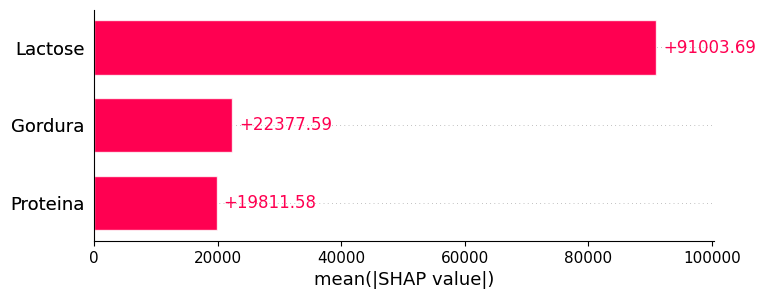

In [ ]:
shap.plots.bar(shap_values, max_display=10)

#shap value - quanto a variável mudou o CCS nas amostras, no caso a lactose tem um impacto de 34.170 (para mais ou para menos, depeendendo do valor da lactose)

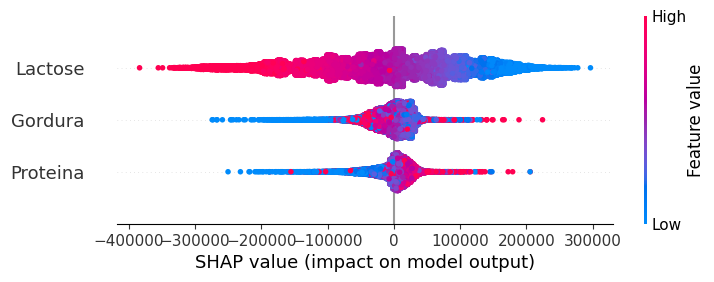

In [ ]:
shap.plots.beeswarm(shap_values)

# bolinha vermelha = lactose alta (ou gordura, ou proteina)
# bolinha azul = baixa

#quando a lactose esta alta (bolinha vermelha), o shap value é negativo, ou seja, o CCS tende a cair
#quando a gordura esta baixa, o ccs tende a cair

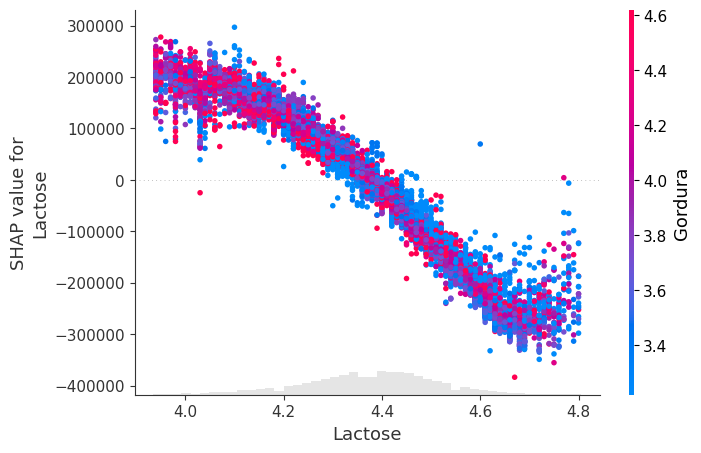

In [ ]:
shap.plots.scatter(shap_values[:, "Lactose"], color=shap_values)


In [ ]:
print(shap_values.values.shape)
print(X_test.shape)


(36999, 3)
(36999, 3)


In [ ]:


i = 0
predito = model.predict(X_test.iloc[[i]])[0]
explicado = shap_values.base_values[i] + shap_values.values[i].sum()

print(f"Predito pelo modelo: {predito}")
print(f"soma dos SHAP values + base_value: {explicado}")
print(f"Erro de explicação: {abs(predito - explicado)}")


Predito pelo modelo: 539504.25
soma dos SHAP values + base_value: 539504.2704863134
Erro de explicação: 0.02048631338402629
